# VIEWS-FAO Starter Notebook
**Index**
- Introduction
- Running `main.py`
- Importing our libraries
- Setting up paths
- Importing your local functions
- Importing the data
- Using the `get_time_period` function
- Using the `calculate_date_index` function
- Using the `get_country_id_by_name` function
- Using the `get_country_name_by_id` function
- Using the `plot_country_time_series` function
- Using the `plot_country_period_map` function

## Introduction

**If you have made it this far** but have not read the `/docs/glossary`, please go read the glossary now. Then come back. I'll still be here. Also, if anything decision-wise or conceptually seems unclear, please see if you can find your answer in `/docs/ADRs`. Before working on this repository, please read the `/docs/guide_to_git_in_vs_code`, `/docs/md&d_python_style_guide`, and the `/docs/contributing_guidelines`.

...

**Welcome back!** This notebook is a quick guide showcasing how we can interact quickly with the VIEWS-FAO data using a number of prebuilt functions. You are, of course, free to interact with the data as you see fit; the functions presented here are simply for convenience.

## Running main.py

**If you have not yet run main.py** please go do so. You can of course get the VIEWS-FAO data throug the Google Cloud Storage links provided on the repositories root README, but the main.py interface will give you more choices and information. For instace, it will allow you to check whether your data is in the expected dir (directory), how your library versions compare to those used by the developers of this repo (repository), and allow you to download and process the data directly. Currently, downloading and processing data may take up to 20 minutes because of tests checking the integrity of the data and transformations involved during data processing steps. Future versions will allow you to forego these tests, but the tests are mandatory while this system undergoes active development.

**Welcome back!** Hopefully main.py was able to execute flawlessly and you're all set up now. If you were not able to excure main.py to your saticfationc see the root README fill for cotact infomations to the project owner and teamlead of this repo.

**Let's move on!**

## Running `main.py`

**If you have not yet run `main.py`, please do so now.** You can, of course, get the VIEWS-FAO data through the Google Cloud Storage links provided in the repository's root README, but the `main.py` interface will give you more choices and information. For instance, it will allow you to check whether your data is in the expected directory, how your library versions compare to those used by the developers of this repository, and allow you to download and process the data directly. This currently takes as long as 20 minutes because a host of different tests are applied to check the integrity of the data and the transformations involved in the processing steps. Future versions will allow you to forego these tests, but as we are still in very active development, the tests are considered mandatory.

**Welcome back!** Hopefully, `main.py` was able to execute flawlessly, and you're all set up now. If you were not able to execute `main.py` to your satisfaction, see the root README file for contact information for the project owner and team lead of this repository.

**Let's move on!**

## Import the Relevant Libraries

This should not be new to you, and hopefully, you have already verified in `main.py` that you have all the relevant libraries, and reasonable versions, installed in the environment you are going to run this notebook with.

In [1]:
import numpy as np
import pandas as pd
import scipy
import matplotlib
import seaborn as sns

import os
from pathlib import Path
import sys


print(np.__version__) # 1.26.4 used
print(pd.__version__) # 2.2.2 used
print(scipy.__version__) # 1.12.0 used
print(matplotlib.__version__) # 3.8.0 used
print(sns.__version__) # 0.13.2 used

1.26.4
2.2.2
1.13.1
3.8.4
0.13.2


**To avoid setting up local paths manually**, the VIEWS MD&D team uses a specific script which is activated as seen below (note that there is a small subtle difference in how this should be implemented in a script versus a notebook).

In [4]:
# Jupyter Notebook solution  --------------------------------------------------------------------------------------------
notebook_dir = os.getcwd() # notebook specific
notebook_name = "starter_notebook.ipynb" # notebook specific name

PATH = Path(notebook_dir) / Path(notebook_name) # notebook specific

# alt script version -----------------------------------------------------------------------------------------------------
# PATH = Path(__file__)

# Common for notebooks and scripts alike
sys.path.insert(0, str(Path(*[i for i in PATH.parts[:PATH.parts.index("VIEWS_FAO_index")+1]]) / "src/utils"))   

from set_paths import setup_project_paths, get_logo_path, get_data_paths, setup_root_paths, get_plot_path
setup_project_paths(PATH)


**This sets up the path structure, meaning that we can import utility and management functions, etc., wherever we are working in the repository. As seen above, we also import a number of functions to give us specific paths.**

Let's try the `get_data_paths` function.

In [5]:

PATH_RAW_VIEWSER, PATH_RAW_EXTERNAL, PATH_PROCESSED, PATH_GENERATED = get_data_paths(PATH)

# lest print the paths
print(PATH_RAW_VIEWSER)
print(PATH_RAW_EXTERNAL)
print(PATH_PROCESSED)
print(PATH_GENERATED) 

/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/raw_viewser
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/raw_external
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/processed
/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/data/generated


This is where you want to fetch and store your data. Hopefully, you'll see that these paths are all **automatically tailored to your machine and folder structure.**

Let's look at some more:

In [6]:
PLOT_PATH = get_plot_path(PATH)

print(PLOT_PATH)

/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/reports/plots


This is where you want to store your plots.

If you need to set up more custom repository paths, you can start with the root like this:

In [7]:
PATH_ROOT = setup_root_paths(PATH)

print(PATH_ROOT)

/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index


And expand as you see fit using the `pathlib` (ProxyPath) syntax. Please don't go rogue and do your own thing, as your PR will not be approved.

In [8]:
PATH_STARTER_NOTEBOOK = PATH_ROOT / 'notebooks/guides/starter_notebook.ipynb'
print(PATH_STARTER_NOTEBOOK)

/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/notebooks/guides/starter_notebook.ipynb


## Importing the Data

If the data is downloaded, processed, and correctly located, you should now be able to import both the monthly and yearly dataframes as follows:

If the data is not yet downloaded and processed, do so by running `main.py`. 

If you cannot get main.py to run you should ask for assistance to solve this issue. But until assistance can be given you can download the data manually, using the following links:

- [Monthly Data](https://storage.googleapis.com/views-fao_bucket_01/data/generated/df_monthly_country_return_periods.pkl)
- [Yearly Data](https://storage.googleapis.com/views-fao_bucket_01/data/generated/df_yearly_country_return_periods.pkl)

Please note that if you use these links, the data should be placed in the `/data/generated/` directory.


In [9]:
# load the data from the pkl
df_monthly = pd.read_pickle(PATH_GENERATED / "df_monthly_country_return_periods.pkl")
df_yearly = pd.read_pickle(PATH_GENERATED / "df_yearly_country_return_periods.pkl")

Note how we use `PATH_GENERATED` and then the file name to generate the full path. 

We can take a quick look at the data:

In [10]:
df_monthly.columns

Index(['month_id', 'pg_id', 'month', 'year_id', 'c_id', 'col', 'row',
       'sb_best', 'ns_best', 'os_best', 'pop_gpw_sum', 'total_best',
       'fatalities_per_100k', 'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')

In [11]:
df_monthly.head(10)

,month_id,pg_id,month,year_id,c_id,col,row,sb_best,ns_best,os_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
0,109,62356,1,1989,192,436,87,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,109,79599,1,1989,192,399,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,109,79600,1,1989,192,400,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,109,79601,1,1989,192,401,111,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
4,109,80317,1,1989,192,397,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
5,109,80318,1,1989,192,398,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,109,80319,1,1989,192,399,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
7,109,80320,1,1989,192,400,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
8,109,80321,1,1989,192,401,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
9,109,80322,1,1989,192,402,112,0.0,0.0,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [12]:
df_monthly.describe()

,month_id,pg_id,month,year_id,c_id,col,row,sb_best,ns_best,os_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
count,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,...,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06,5.506200e+06
mean,3.185000e+02,1.447941e+05,6.500000e+00,2.006000e+03,1.418858e+02,4.076765e+02,2.015367e+02,2.073385e-01,3.191184e-02,1.885889e-01,...,7.009011e+00,1.022721e+00,2.645854e+00,1.335458e-02,1.928862e+00,8.610657e-03,2.513040e+00,1.248284e-02,3.080509e+00,1.531546e-02
std,1.212432e+02,2.670816e+04,3.452053e+00,1.009951e+01,6.561906e+01,3.667092e+01,3.709581e+01,7.682069e+01,2.910317e+00,1.108309e+02,...,5.143155e+02,1.719783e+00,2.806759e+02,1.041708e+00,2.619333e+02,8.762650e-01,2.896182e+02,1.036234e+00,2.973130e+02,1.097988e+00
min,1.090000e+02,6.235600e+04,1.000000e+00,1.989000e+03,4.000000e+01,3.100000e+02,8.700000e+01,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2.137500e+02,1.264360e+05,3.750000e+00,1.997000e+03,7.000000e+01,3.830000e+02,1.760000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,3.185000e+02,1.494575e+05,6.500000e+00,2.006000e+03,1.570000e+02,4.100000e+02,2.080000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,4.232500e+02,1.660120e+05,9.250000e+00,2.015000e+03,2.130000e+02,4.350000e+02,2.310000e+02,0.000000e+00,0.000000e+00,0.000000e+00,...,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,5.280000e+02,1.905110e+05,1.200000e+01,2.023000e+03,2.540000e+02,4.870000e+02,2.650000e+02,1.219150e+05,2.000000e+03,1.784590e+05,...,3.654000e+05,4.204996e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02,1.000000e+05,2.400000e+02


In [13]:
df_yearly.columns

Index(['pg_id', 'year_id', 'c_id', 'row', 'col', 'sb_best', 'ns_best',
       'os_best', 'pop_gpw_sum', 'total_best', 'fatalities_per_100k',
       'sb_per_100k', 'ns_per_100k', 'os_per_100k',
       'total_best_per_100k_country', 'sb_best_per_100k_country',
       'os_best_per_100k_country', 'ns_best_per_100k_country',
       'sb_best_value_count', 'sb_best_p_i', 'sb_best_P_i', 'sb_best_e_i',
       'sb_best_E_i', 'ns_best_value_count', 'ns_best_p_i', 'ns_best_P_i',
       'ns_best_e_i', 'ns_best_E_i', 'os_best_value_count', 'os_best_p_i',
       'os_best_P_i', 'os_best_e_i', 'os_best_E_i', 'total_best_value_count',
       'total_best_p_i', 'total_best_P_i', 'total_best_e_i', 'total_best_E_i',
       'sb_best_b_i', 'sb_best_B_i', 'ns_best_b_i', 'ns_best_B_i',
       'os_best_b_i', 'os_best_B_i', 'total_best_b_i', 'total_best_B_i'],
      dtype='object')

In [14]:
df_yearly.head(10)

,pg_id,year_id,c_id,row,col,sb_best,ns_best,os_best,pop_gpw_sum,total_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
0,62356,1989,192,87,436,0.0,0.0,0.0,0.000000,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
1,79599,1989,192,111,399,0.0,0.0,0.0,3890.091064,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
2,79600,1989,192,111,400,0.0,0.0,0.0,2452.416016,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
3,79601,1989,192,111,401,0.0,0.0,0.0,11328.425781,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
4,80317,1989,192,112,397,0.0,0.0,0.0,313145.781250,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
5,80318,1989,192,112,398,0.0,0.0,0.0,722217.375000,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
6,80319,1989,192,112,399,0.0,0.0,0.0,51746.175781,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
7,80320,1989,192,112,400,0.0,0.0,0.0,13658.141602,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
8,80321,1989,192,112,401,0.0,0.0,0.0,17416.437500,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0
9,80322,1989,192,112,402,0.0,0.0,0.0,18555.277344,0.0,...,1.0,1.0,0,0,0,0,0,0,0,0


In [15]:
df_yearly.describe()

,pg_id,year_id,c_id,row,col,sb_best,ns_best,os_best,pop_gpw_sum,total_best,...,total_best_e_i,total_best_E_i,sb_best_b_i,sb_best_B_i,ns_best_b_i,ns_best_B_i,os_best_b_i,os_best_B_i,total_best_b_i,total_best_B_i
count,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,4.587190e+05,458719.000000,...,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000,458719.000000
mean,144783.774962,2006.003348,141.598658,201.522381,407.660784,2.488759,0.383045,2.263667,8.622384e+04,5.135471,...,6.440192,1.016191,2.479950,0.012452,1.859744,0.008607,2.366154,0.011772,2.760514,0.014039
std,26704.645974,10.097913,65.557662,37.090966,36.663870,307.790353,15.495974,464.096339,2.633476e+05,558.577782,...,148.679420,0.477601,87.149993,0.425740,79.930868,0.362643,85.589556,0.416964,89.329927,0.445431
min,62356.000000,1989.000000,40.000000,87.000000,310.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,126435.000000,1997.000000,70.000000,176.000000,383.000000,0.000000,0.000000,0.000000,3.522424e+03,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,149456.000000,2006.000000,157.000000,208.000000,410.000000,0.000000,0.000000,0.000000,2.196521e+04,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,166009.000000,2015.000000,213.000000,231.000000,435.000000,0.000000,0.000000,0.000000,7.715432e+04,0.000000,...,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,190511.000000,2023.000000,246.000000,265.000000,487.000000,157317.000000,5374.000000,229102.000000,1.241601e+07,229104.000000,...,30450.000000,35.501806,10000.000000,32.000000,10000.000000,32.000000,10000.000000,32.000000,10000.000000,32.000000


If everything looks as you expect, let's move on.

## Import Local Functions

After having run the `setup_project_paths` above, importing local functions is straightforward. Two things should be noted:
1. Most functions occupy their own script, only accompanied by small check and helper functions.
2. We never use `from script import *`. Instead, we are always explicit in what is imported: `from script import function1, function2`. This helps with debugging and development as it makes it much easier to figure out where individual functions and scripts reside.

Now, on with it:

In [18]:
from utils_get_time_period import get_time_period
from utils_date_index import calculate_date_from_index
from utils_get_country_id_by_name import get_country_id_by_name
from utils_get_country_names_by_ids import get_country_names_by_ids
from utils_plotting_country_time_series import plot_country_time_series
from utils_plotting_country_period_map import plot_country_period_map

Nothing to it. We'll now go through each function one by one.

## Using the `get_time_period` Function

A simple function that returns the feature/column representing the time period in the specific DataFrame. This will give a different result depending on whether we are working on a monthly or yearly DataFrame.

In [19]:
time_period = get_time_period(df_monthly)
print(time_period)

month_id


In [20]:
time_period = get_time_period(df_yearly)
print(time_period)

year_id


This function is mainly used to make other functions robust enough to take both kinds of DataFrames and process/plot them correctly.

## Using the `calculate_date_from_index` Function

For the yearly dataset, the `year_id` is simply the year, e.g., "1991". This does not leave a lot of room for confusion. The monthly dataset, however, has both a `month` and a `month_id` feature. Here, `month` is 1-12, representing January through December. However, `month_id` is a unique monthly ID where 121 is January 1991. Doing the mental math to figure out which month and year a specific `month_id` corresponds to is tiresome, so here is a function that does that:

In [21]:
month_id = 515
date = calculate_date_from_index(month_id)
print(date)

11.2022


This is convenient for analysis, checks, and annotation/labeling in plots.

# Using the `country_id_by_name` Function

Similar to the `month_id`, there exists a country ID (`c_id`). This is also an integer, and it's not intuitive or trivial to figure out which country ID corresponds to which country. This is a helper function that allows you to find the ID given a country name.

In [22]:
c_id = get_country_id_by_name('Mali')
print(c_id)

[(50, 'Mali'), (120, 'Somalia'), (161, 'Malawi')]


This output might be a bit surprising. The reason you see more countries, including those not named Mali, is that the function performs a fuzzy search and returns all countries that could match your description. This also means we are more likely to catch countries that have changed names over time.

In [23]:
print(get_country_id_by_name('Germany'))

[(184, 'Germany'), (185, 'Germany Federal Republic'), (186, 'Germany Democratic Republic')]


Additionally, you can be careless in your spelling and still get by:

In [24]:
print(get_country_id_by_name('bukinefaso'))

[(47, 'Burkina Faso')]


This is rarely useful in production, but for data exploration and analysis, it comes in handy all the time.

## Using the `get_country_names_by_id` Function

The inverse function also exists, i.e., a function that takes IDs and returns names. For convenience, this function accepts lists of strings.

In [25]:
country_name = get_country_names_by_ids([50])
print(country_name)

{50: 'Mali'}


So, we can add more at once.

In [22]:
country_names = get_country_names_by_ids([47, 50, 120, 184])
print(country_names)

{47: 'Burkina Faso', 50: 'Mali', 120: 'Somalia', 184: 'Germany'}


## Plotting a Time Series

This can naturally be done in a thousand different ways, but we have one helper function that does a good job of delivering something quick but useful. Let's look at the docstring first (WHAT!? Yes...):

In [26]:
plot_country_time_series?

Signature:
plot_country_time_series(
    df,
    country_ids,
    feature,
    time_periods=None,
    manual_title=None,
    figsize=(12, 8),
    PATH=PosixPath('/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils/utils_plotting_country_time_series.py'),
    logo_placement=(0.9, 0.85),
    logo_size=0.6,
    legend_placement=(0.8, 1),
    force_color=None,
    save_plot=False,
    PATH_PLOT=None,
)
Docstring:
Plots time series data for a given feature and multiple countries.

Parameters:
df (pd.DataFrame): DataFrame containing the data.
country_ids (list): List of country IDs to filter the data.
feature (str): The feature/column to plot.
time_periods (list, optional): List of time periods to plot. Defaults to all periods.
manual_title (str, optional): Manual title for the plot. Defaults to None in which case the title is generated automatically.
figsize (tuple, optional): Figure size for the plot. Defaults to (12, 8).

Returns:
None
File:      ~/Documents/GitHub/VIEWS_FAO_in

Let's plot Mali using the yearly DataFrame and plot the feature `sb_best_per_100k_country`—i.e., UCDP's best estimate of state-based conflict fatalities per 100k population.

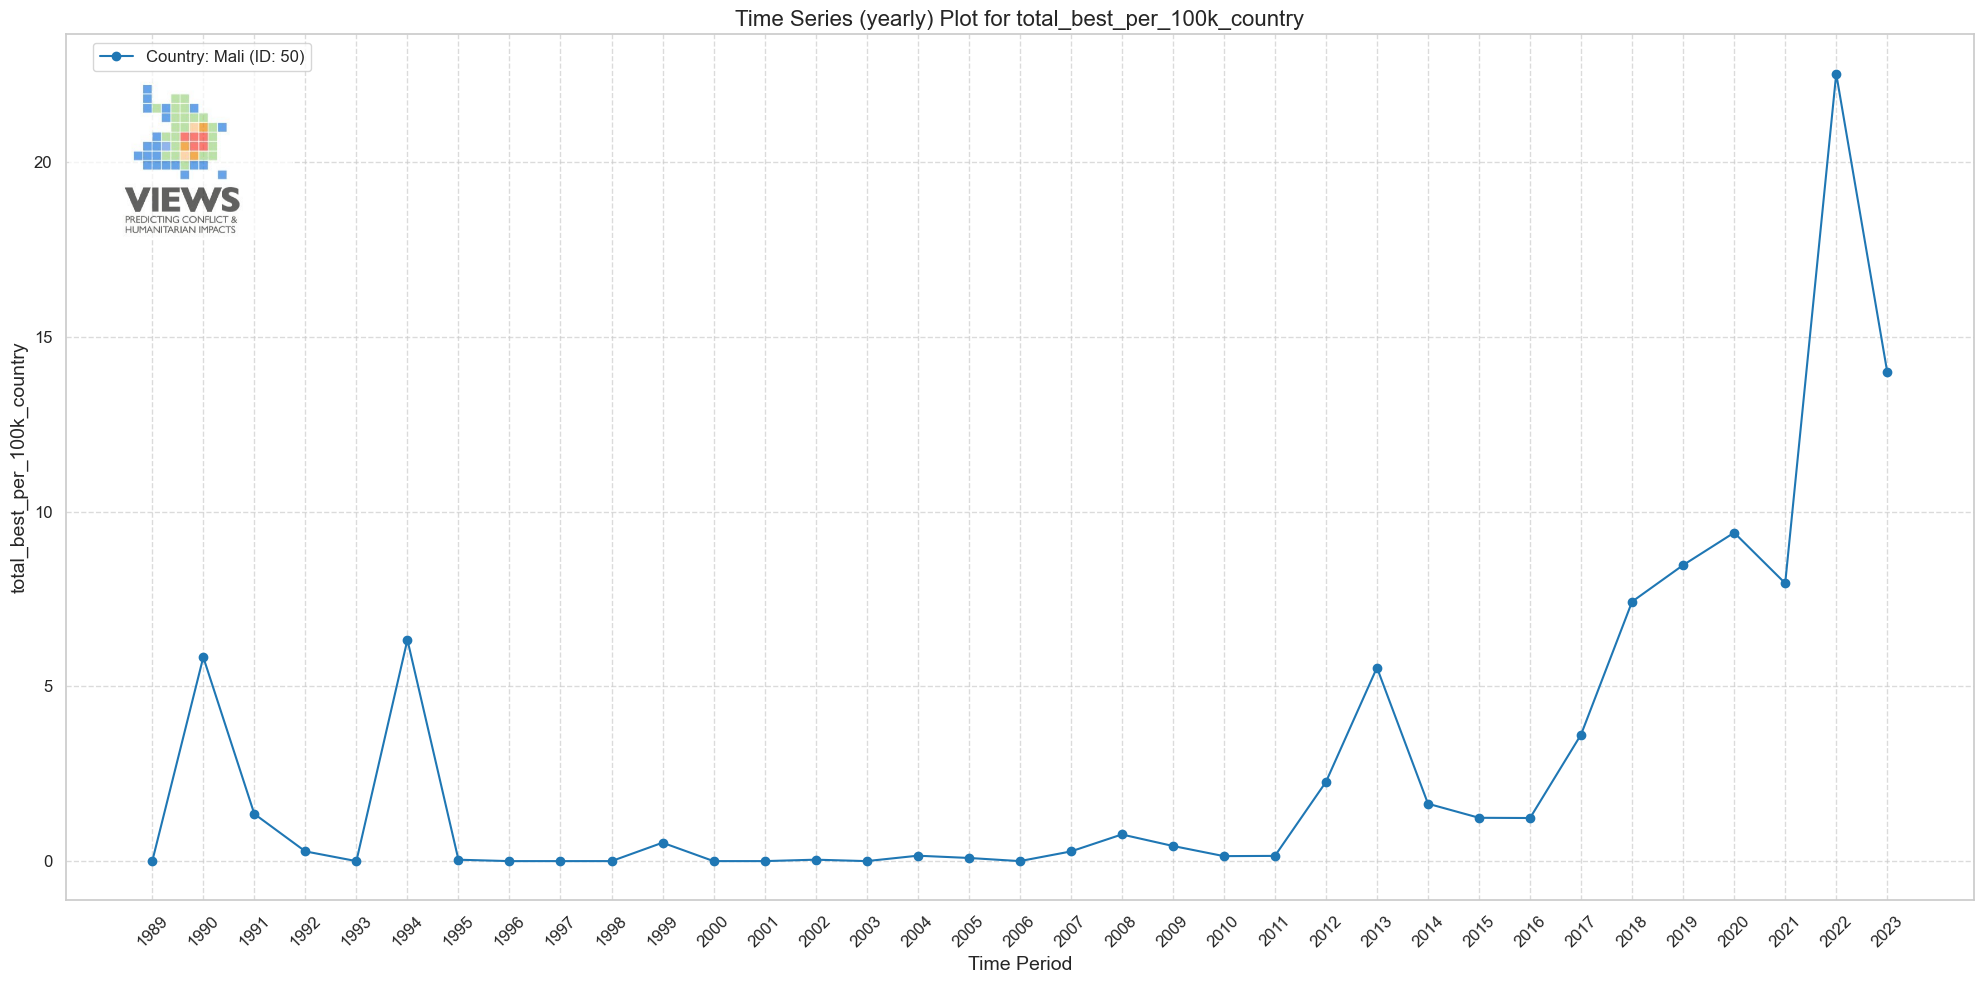

In [27]:
country_ids = [50] # note that this is a list - we'll get back to this
feature = 'total_best_per_100k_country'

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

And for monthly:

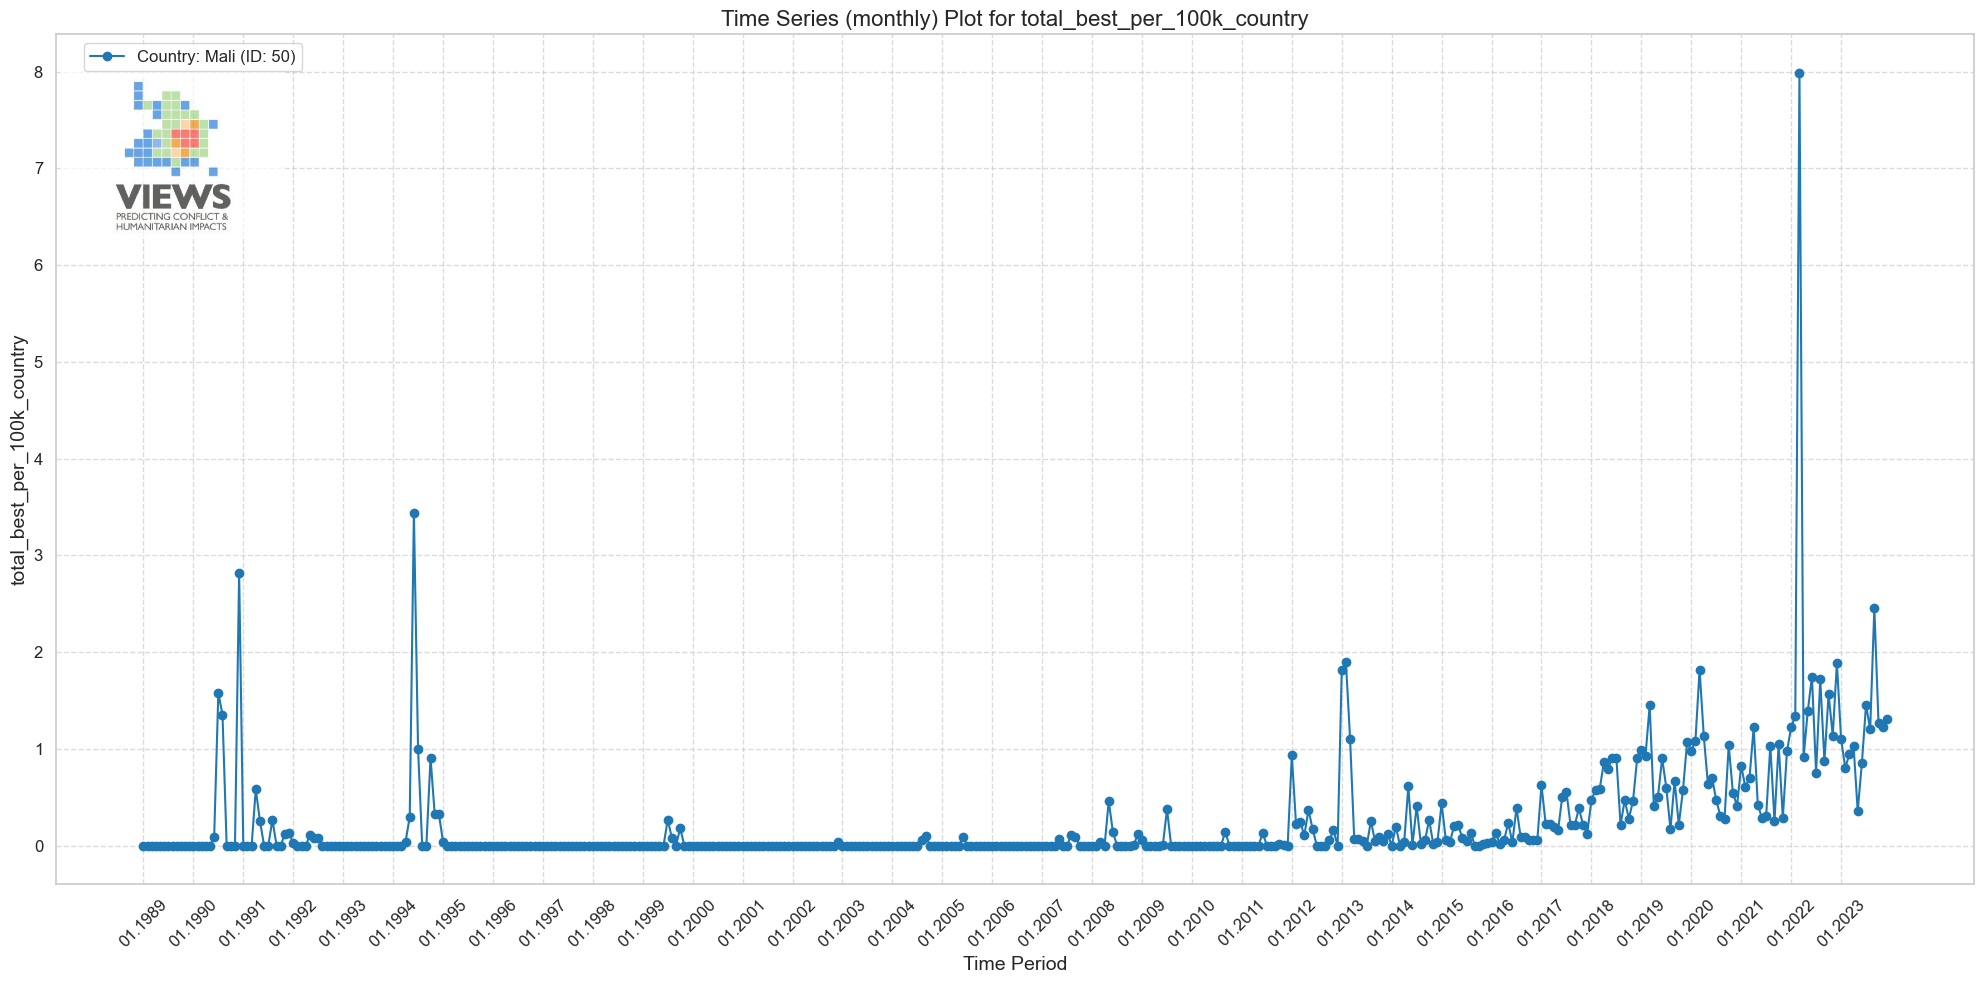

In [28]:
plot_country_time_series(df_monthly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1))

You can enforce a specific color and title:

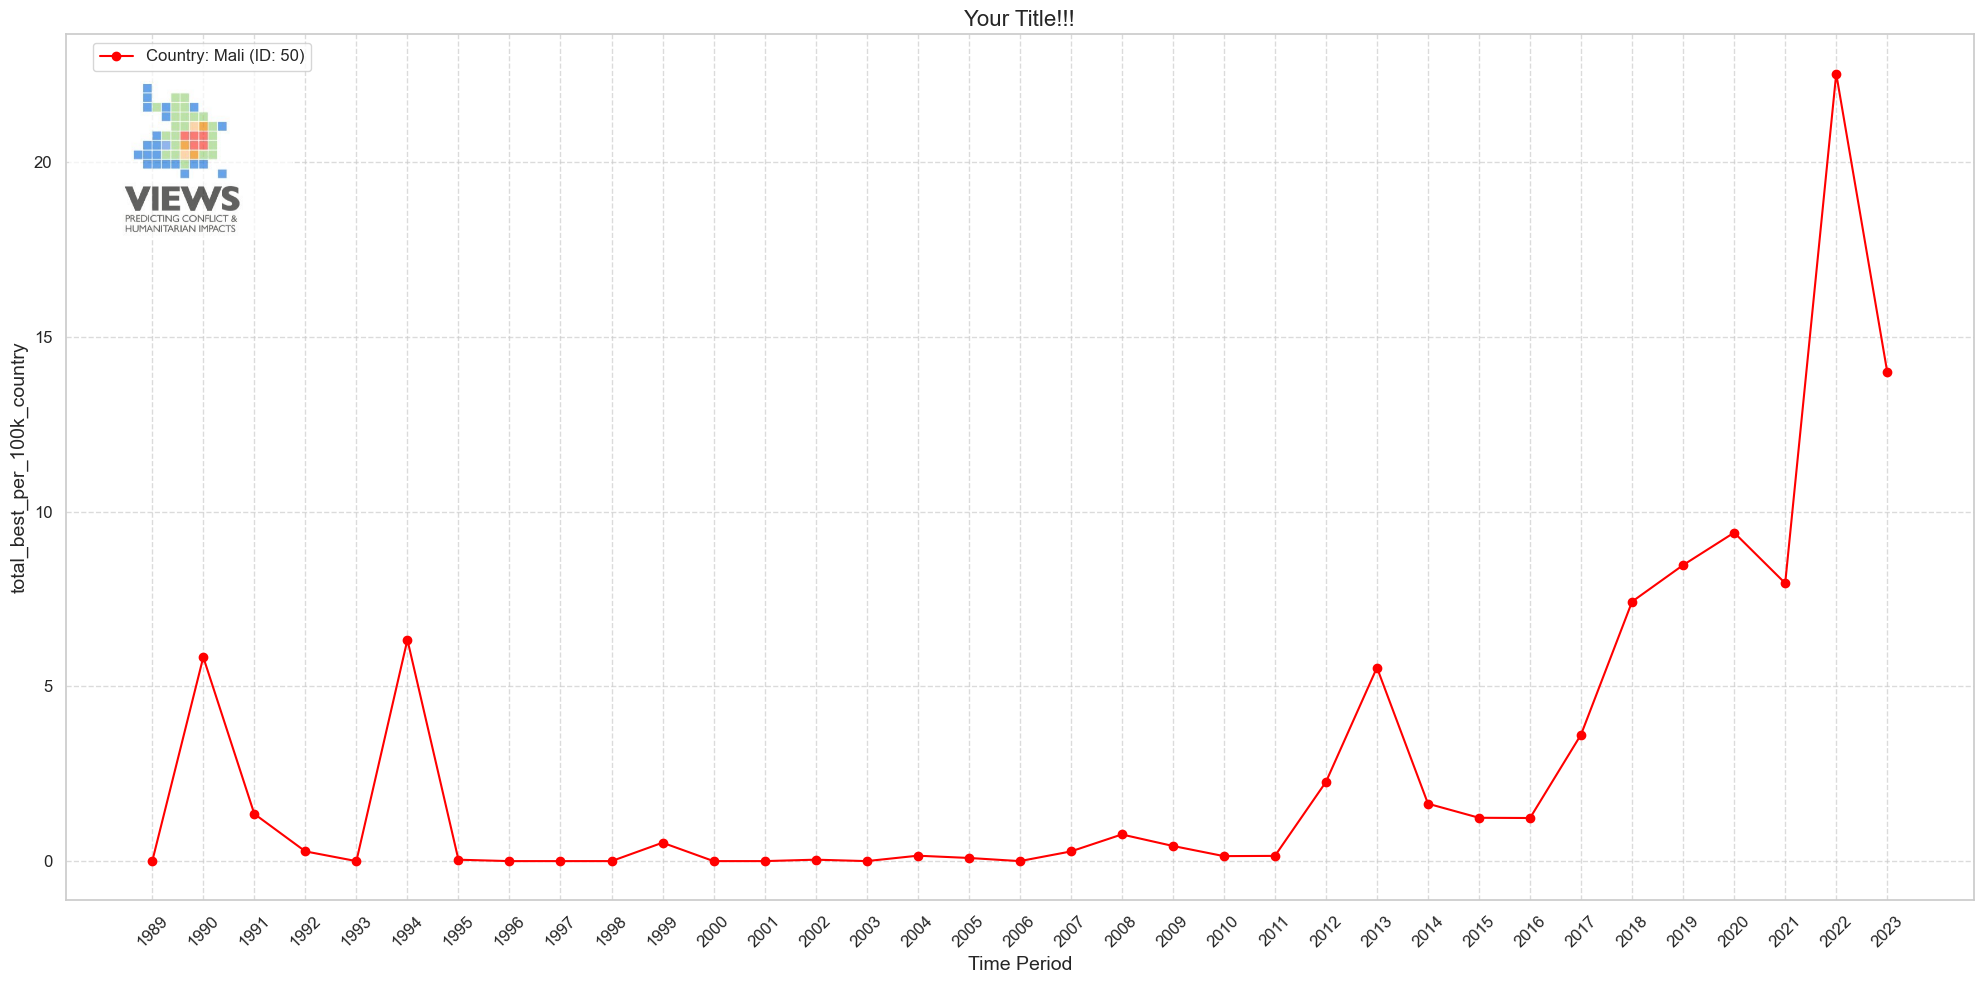

In [29]:
manual_title='Your Title!!!'
force_color = 'red'

plot_country_time_series(df_yearly, [50], 'total_best_per_100k_country', manual_title= manual_title, figsize=(20, 10), logo_placement = (0.06, 0.87), logo_size= 0.4, legend_placement=(0.01, 1), force_color=force_color)

We can add more countries:
(though admittedly, depending on the countries you pick, the visuals might suffer a bit given this version. To be improved)

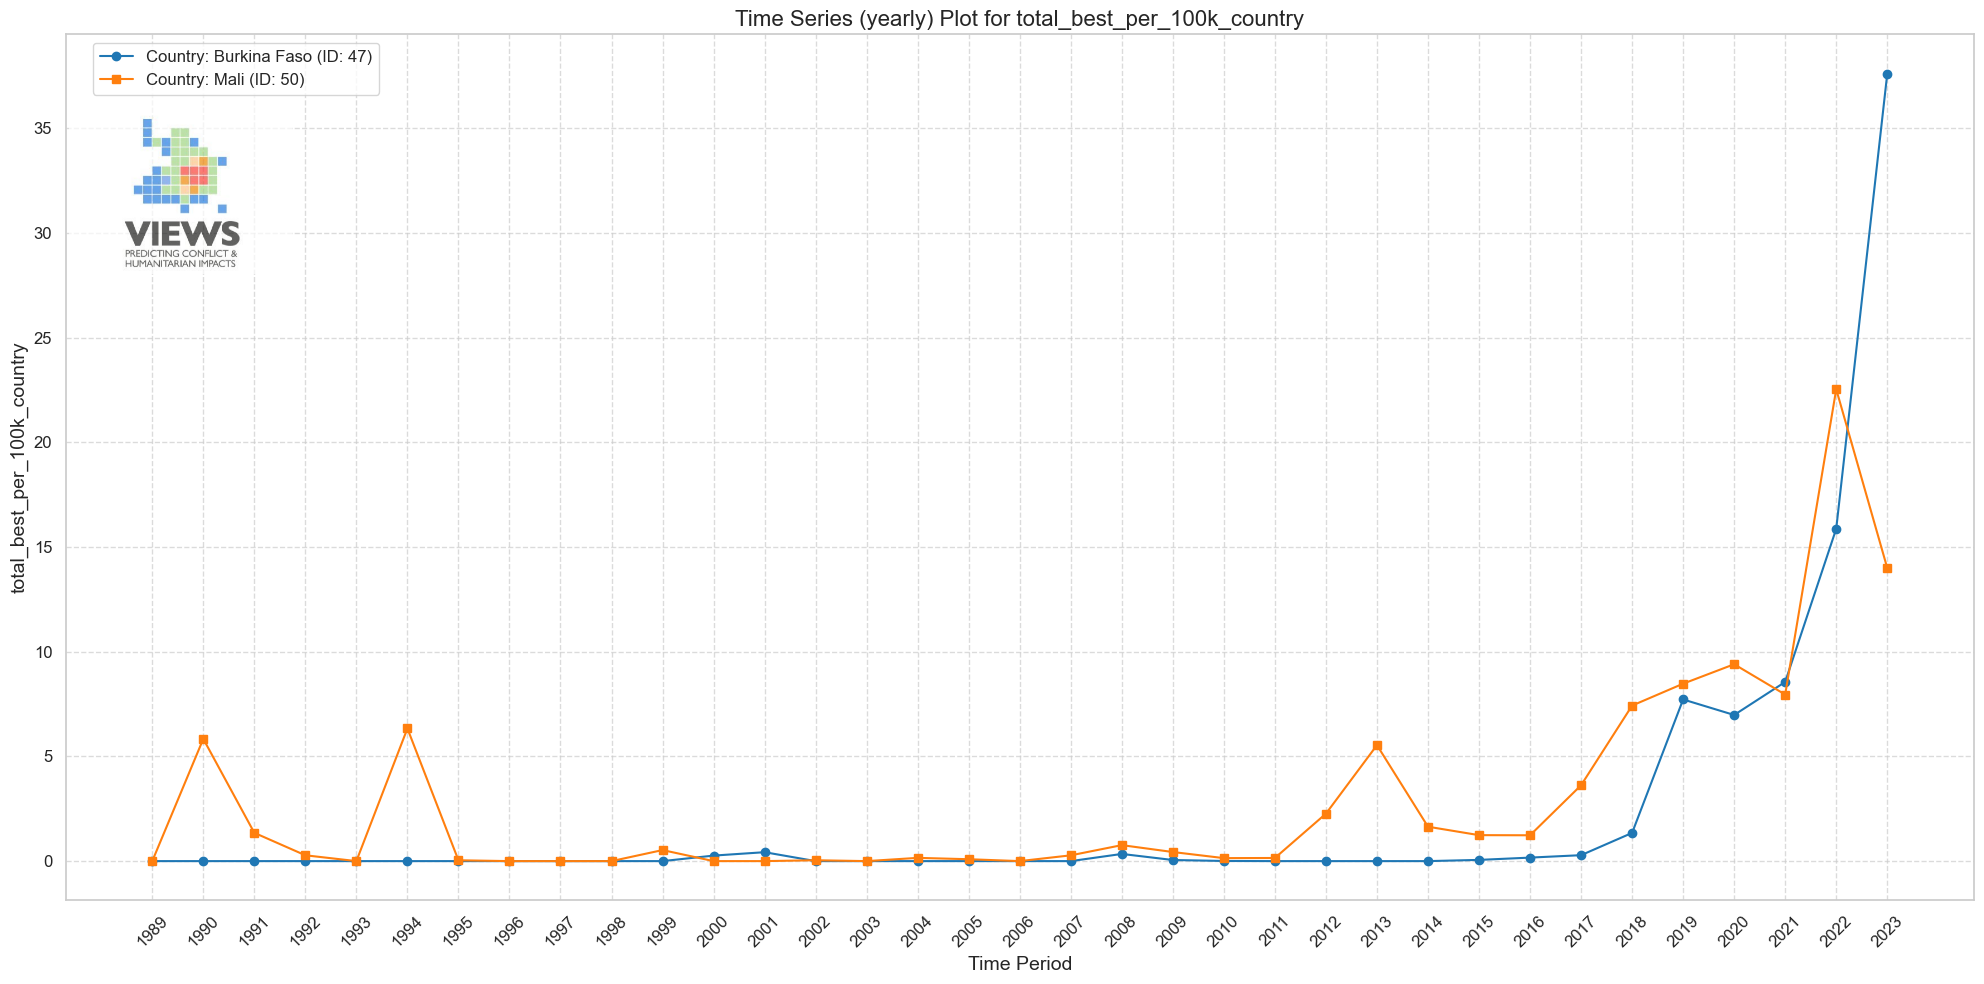

In [30]:
country_ids = [47, 50] # note that this is a list - we'll get back to this
feature = 'total_best_per_100k_country'

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize=(20, 10), logo_placement = (0.06, 0.83), logo_size= 0.4, legend_placement=(0.01, 1))

For your convenience, plot size, logo and legend placement, and logo size can be adjusted easily:

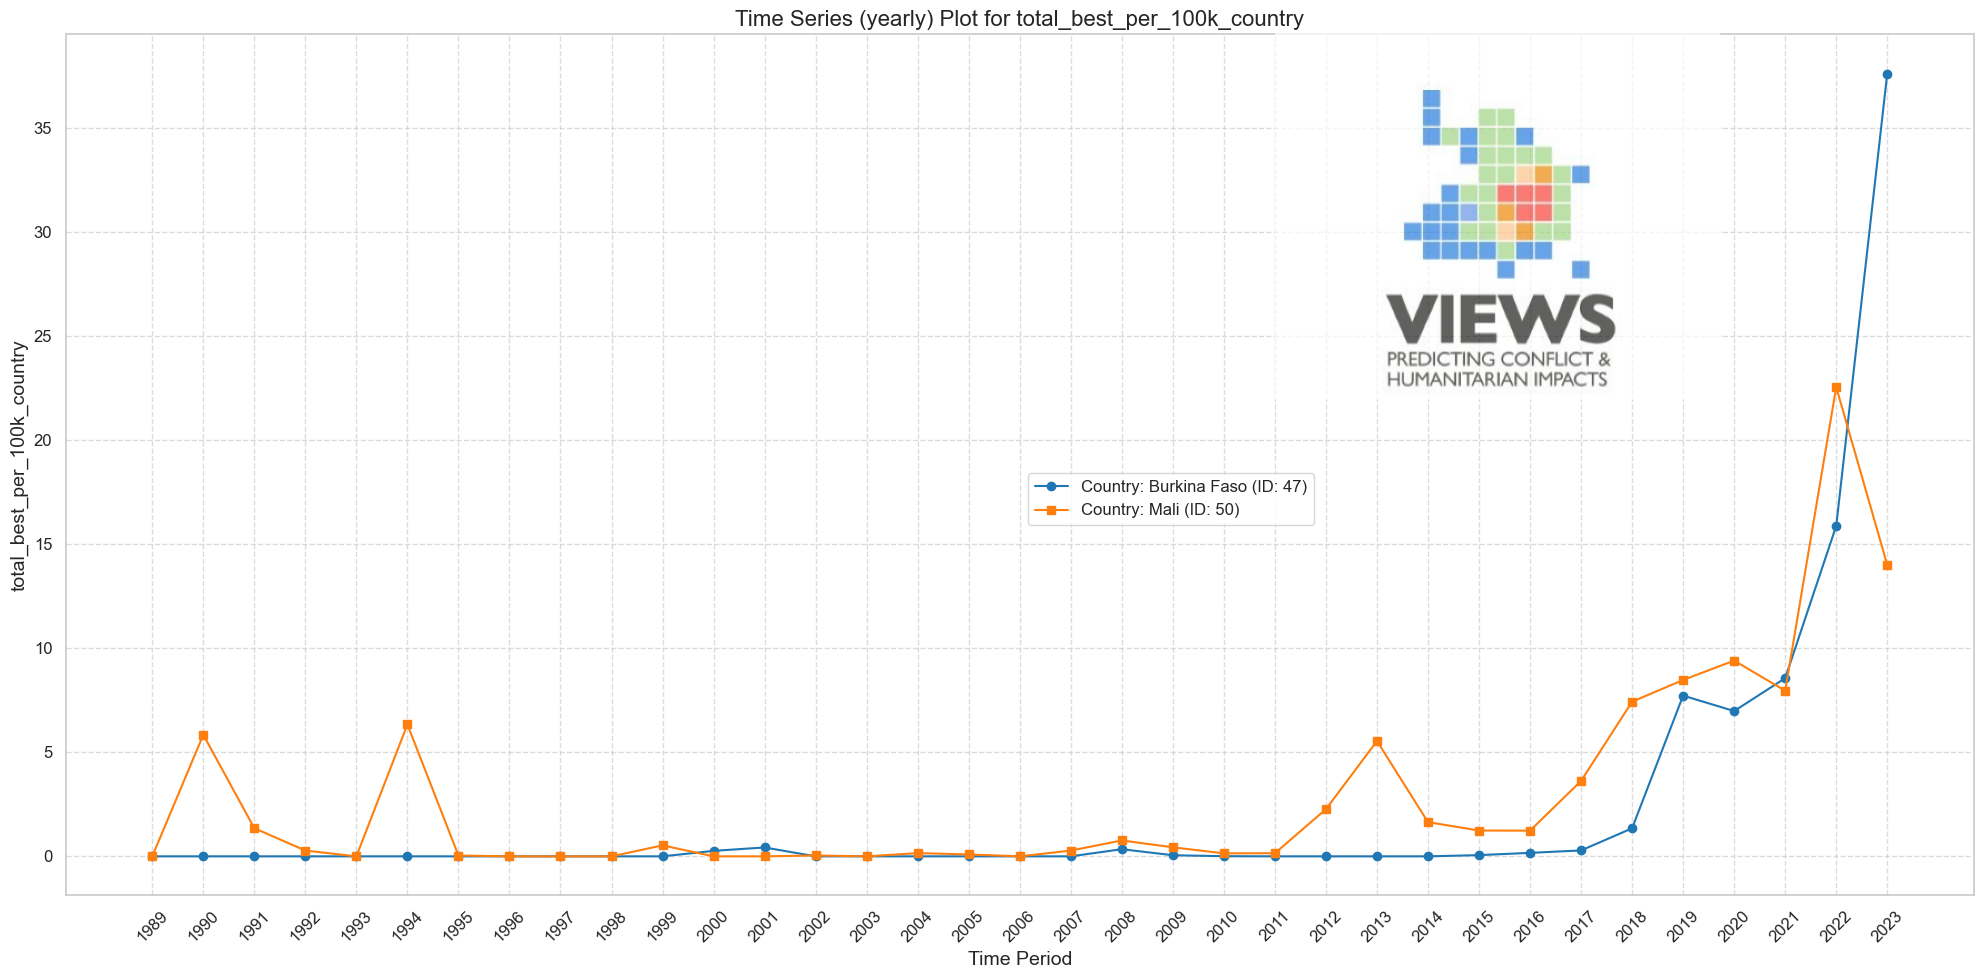

In [31]:
figsize = (20,10)
logo_placement = (0.75, 0.79)
logo_size= 0.8
legend_placement=(0.5, 0.5)

plot_country_time_series(df_yearly, country_ids = country_ids, feature=feature, figsize = figsize, logo_placement = logo_placement, logo_size=logo_size, legend_placement=legend_placement)

**This plots have "save_plot = False/True", "PATH_PLOT = None/[path]" to save the plots. Use PATH_PLOT as shown above**

Now onwards!

# Using the `plot_country_period_map`

The interface is very similar, but let's look at the docstring:

In [32]:
plot_country_period_map?

Signature:
plot_country_period_map(
    df,
    country_id,
    features,
    time_period_ids,
    shared_feature_min_max=False,
    manual_title=None,
    figsize=(16, 8),
    PATH=PosixPath('/Users/alexatimlick/Documents/GitHub/VIEWS_FAO_index/src/utils/utils_plotting_country_period_map.py'),
    logo_placement=(0.9, 0.85),
    logo_size=0.6,
    save_plot=False,
    PATH_PLOT=None,
)
Docstring:
Plots a grid of maps for a given country over specified time periods and features.

Parameters:
df (pd.DataFrame): DataFrame containing the data to be plotted. Must include columns for country ID, time period, row, col, and features.
country_id (int): The ID of the country to be plotted.
features (list of str): List of feature names to be plotted.
time_period_ids (list of int): List of time period IDs to be plotted.
shared_feature_min_max (bool, optional): If True, all subplots of the same feature will share the same color scale. Defaults to False.
manual_title (str, optional): Title for the 

Cool. Let's try to plot a specific country, during a specific month, and one specific feature:

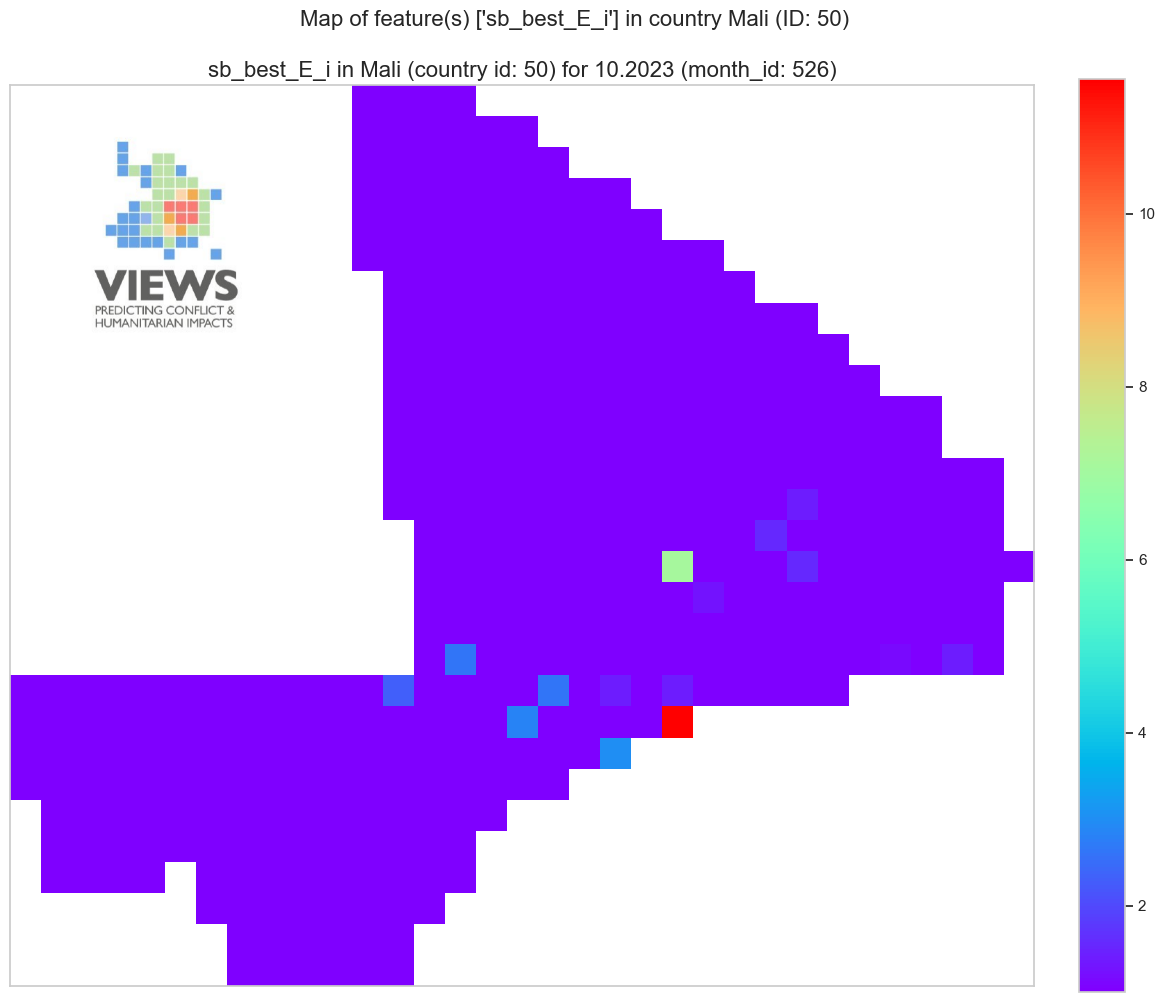

In [33]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [526], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

We can also do a year instead:

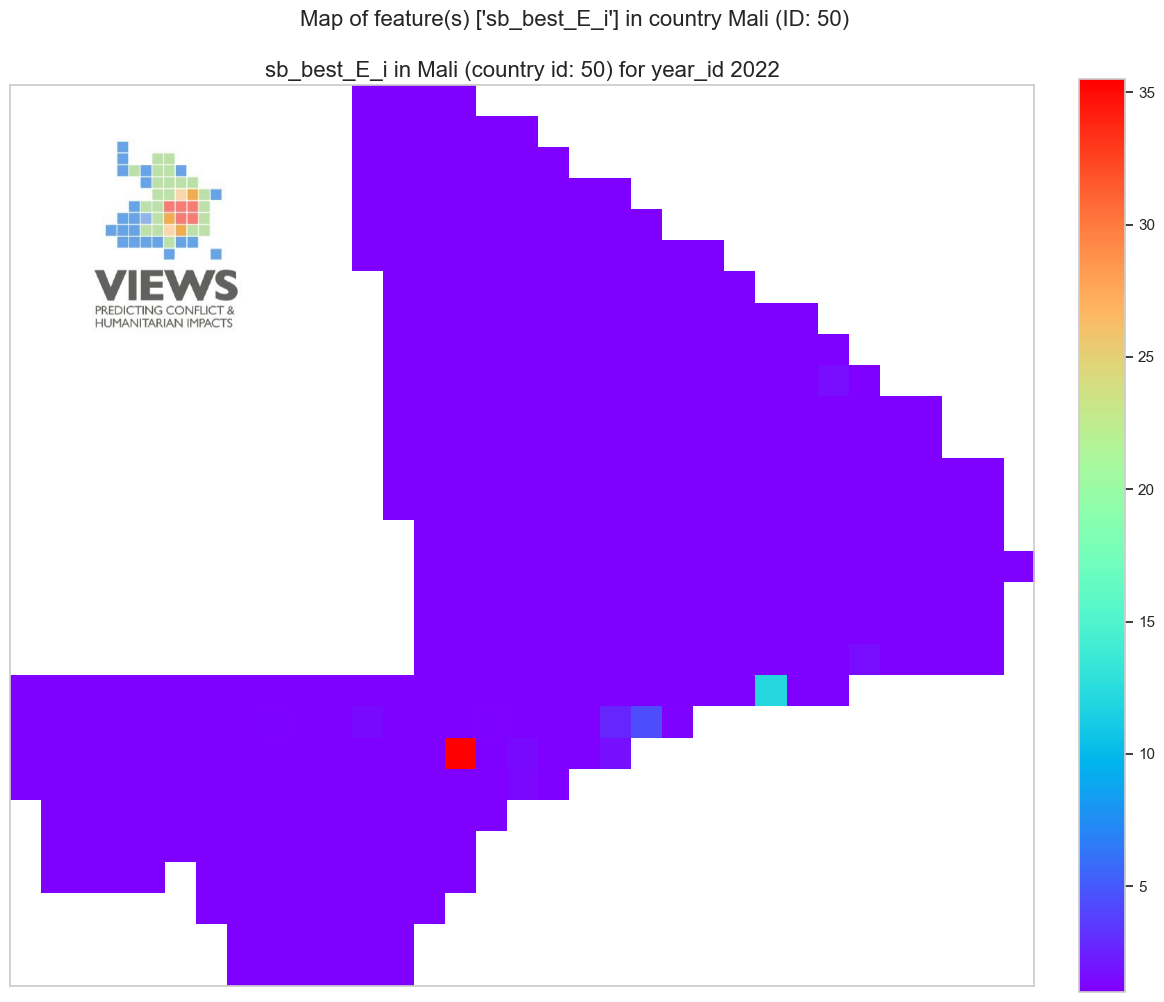

In [34]:
plot_country_period_map(df_yearly, country_id= 50, features= ['sb_best_E_i'], time_period_ids= [2022], figsize=(12, 10), logo_placement = (0.15, 0.85), logo_size = 0.5)

You might be wondering why both feature and time period are lists. This is so we can plot multiple items at a time!

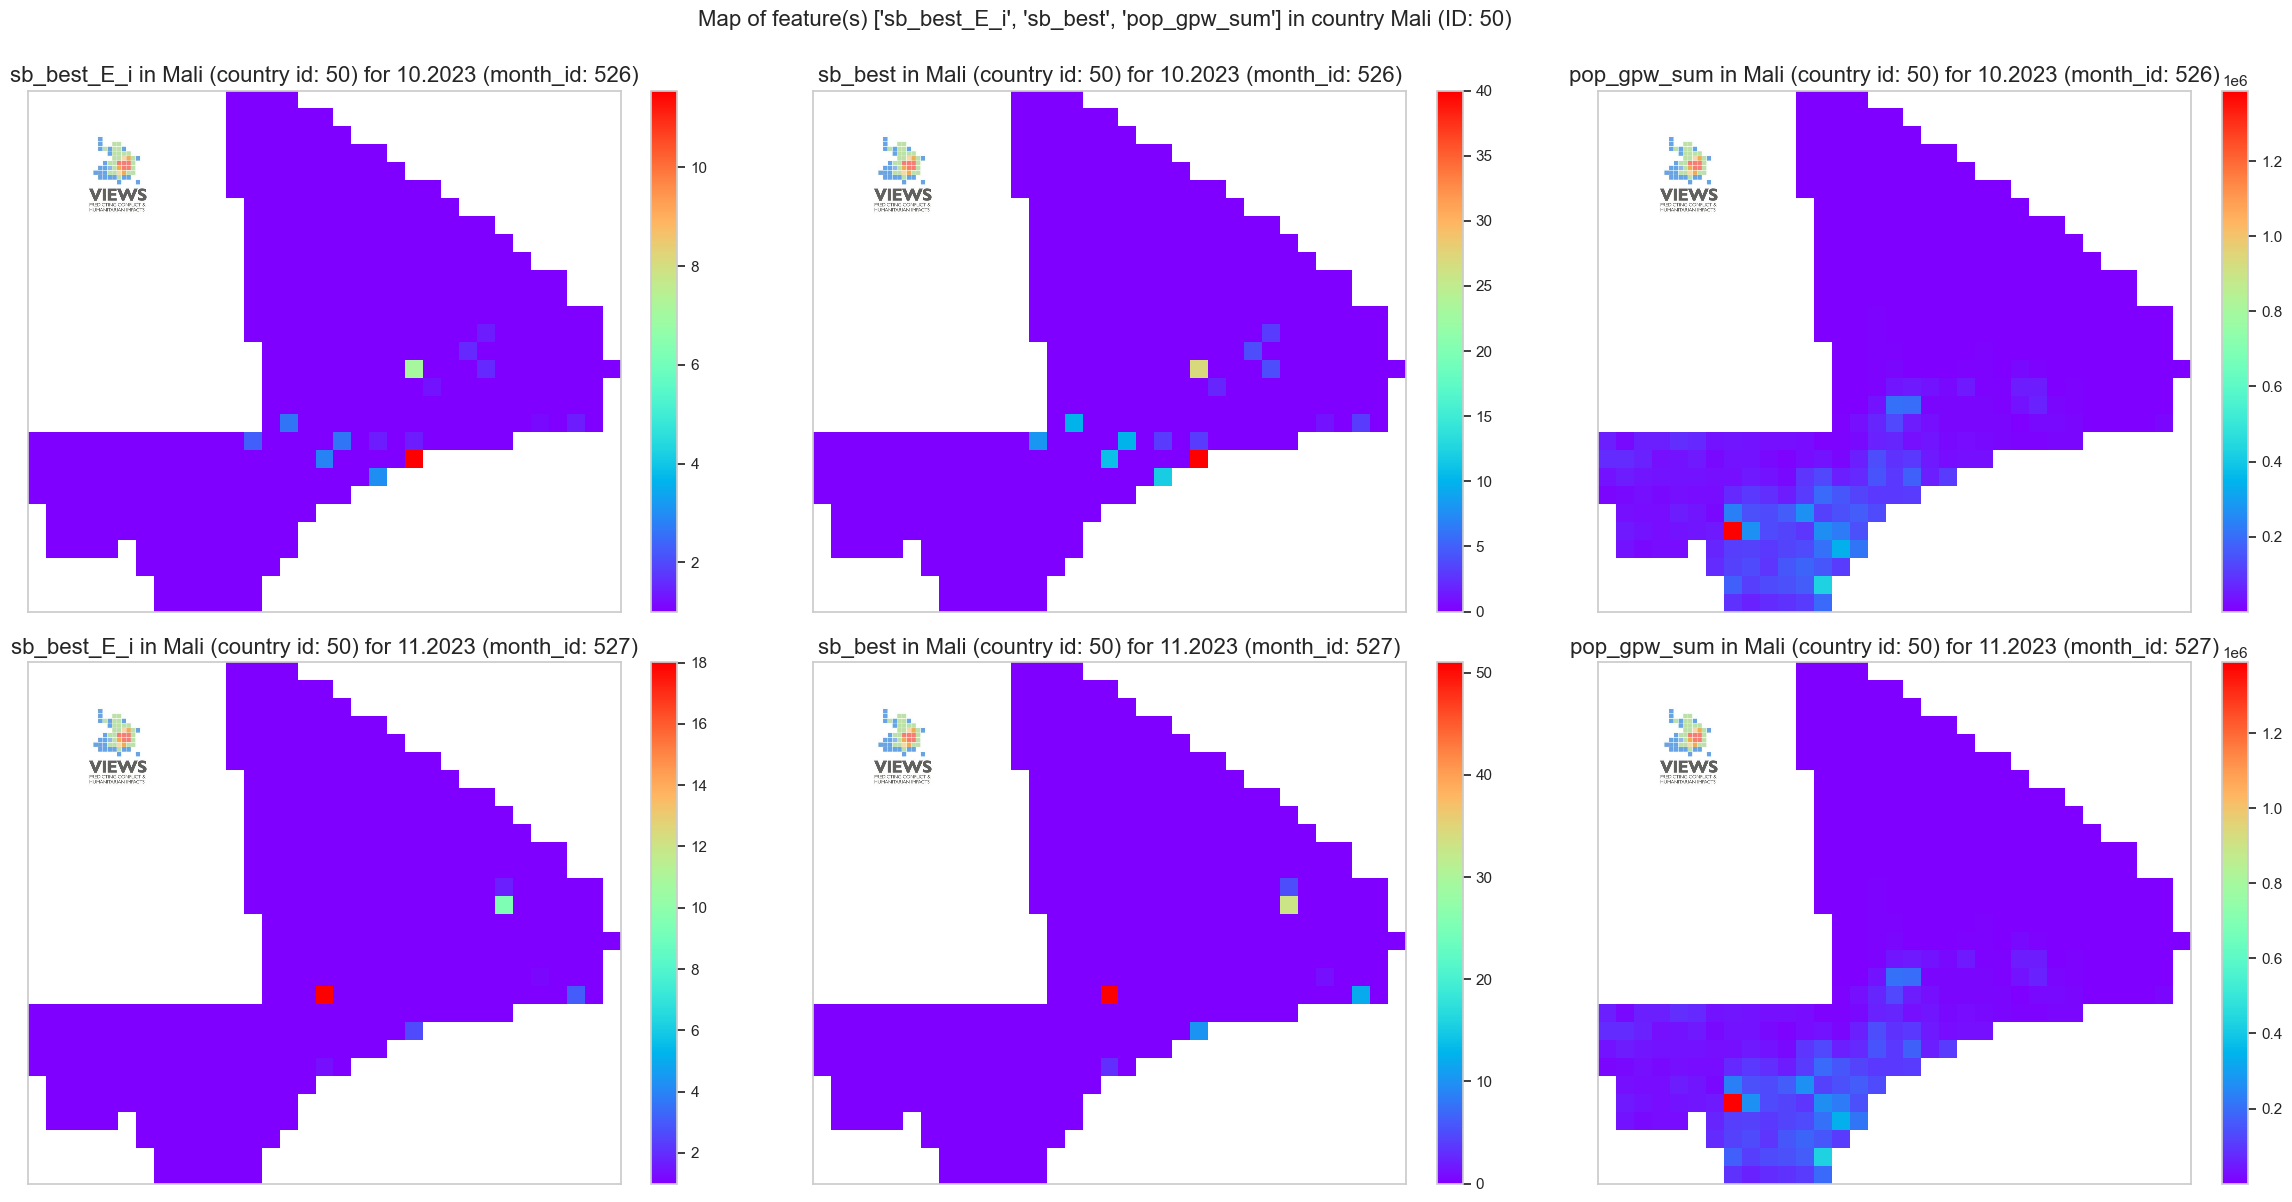

In [36]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_E_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**Note: Time periods differ by row and features by column**

We can enforce a title and ensure that the vmin/vmax of the features across plots are shared (notice how the color bar now represents the same scale within each feature).

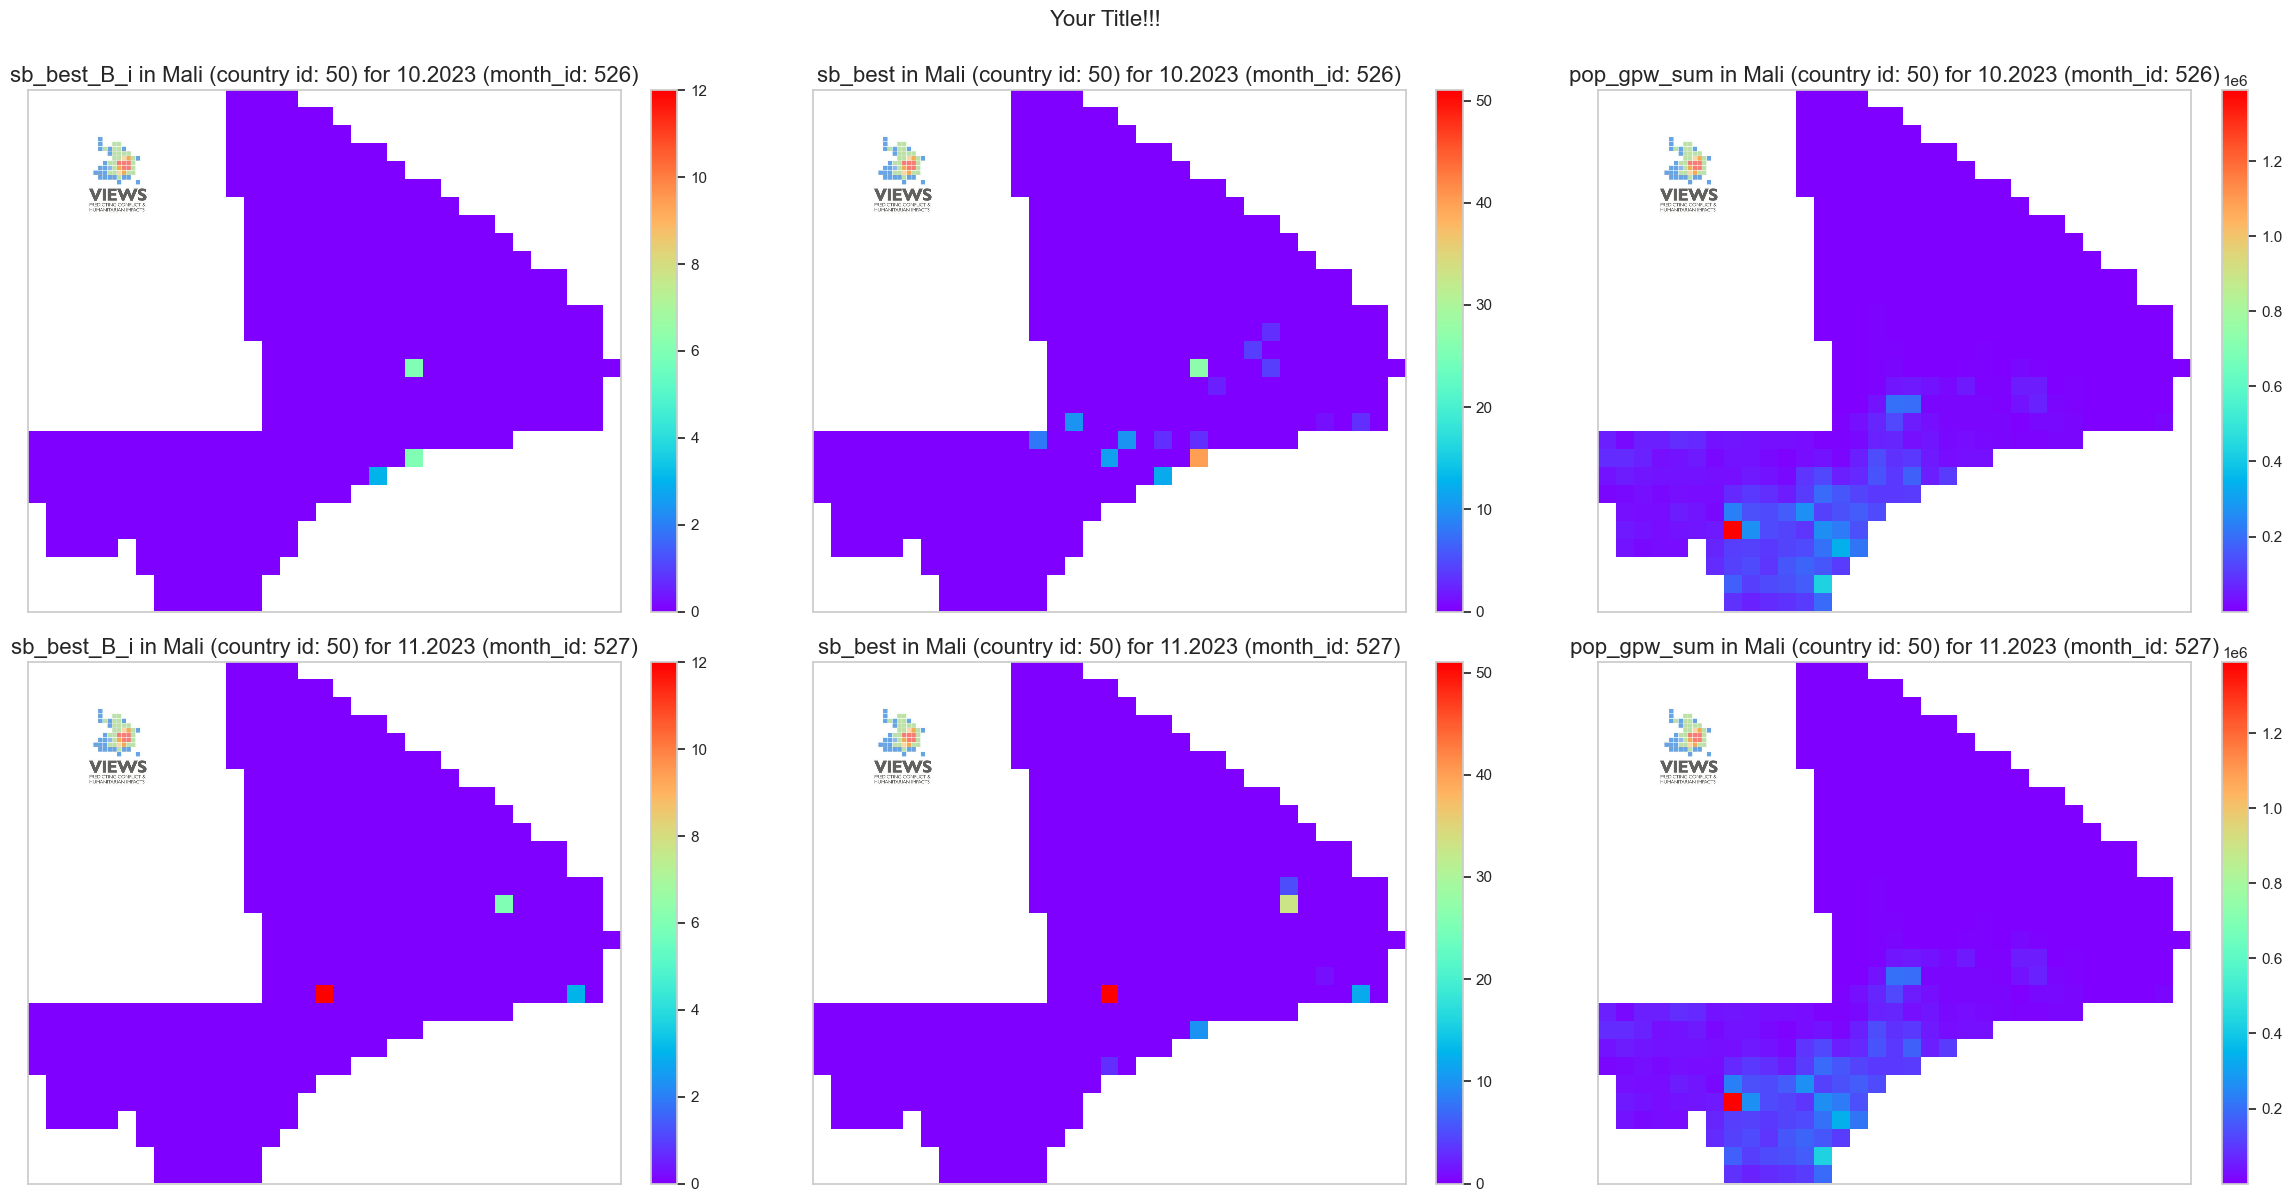

In [37]:
plot_country_period_map(df_monthly, country_id= 50, features= ['sb_best_B_i', 'sb_best', 'pop_gpw_sum'], time_period_ids= [526, 527], shared_feature_min_max= True, manual_title='Your Title!!!', figsize=(24, 12), logo_placement = (0.15, 0.85), logo_size = 0.2)

**This plots have "save_plot = False/True", "PATH_PLOT = None/[path]" to save the plots. Use PATH_PLOT as shown above**

## THE END 